In [1]:
import pandas as pd


In [7]:
df1=pd.read_csv("C:/Users/HP PC/Downloads/flat_file_dataset.csv")
df2=pd.read_csv("C:/Users/HP PC/Downloads/website_dataset.csv")
df3=pd.read_csv("C:/Users/HP PC/Downloads/api_dataset.csv")

In [8]:
df1.info()
df2.info()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117088 entries, 0 to 117087
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   SN                                 117088 non-null  int64 
 1   customer_id                        117088 non-null  int64 
 2   satisfaction                       117088 non-null  object
 3   gender                             117088 non-null  object
 4   customer_type                      117088 non-null  object
 5   age                                117088 non-null  int64 
 6   type_of_travel                     117088 non-null  object
 7   class                              117088 non-null  object
 8   flight_distance                    117088 non-null  int64 
 9   seat_comfort                       117088 non-null  int64 
 10  departure/arrival_time_convenient  117088 non-null  int64 
 11  food_and_drink                     117088 non-null  

In [9]:
# Merge the datasets
merged_df = df1.merge(df2, on='SN')

In [10]:
merged_df = merged_df.merge(df3, on='SN')

# View the merged dataset
print(merged_df)

   SN  customer_id satisfaction  gender   customer_type  age   type_of_travel  \
0   1       110278    satisfied    Male  Loyal Customer   47  Personal Travel   
1   2       103199    satisfied  Female  Loyal Customer   15  Personal Travel   
2   3        47462    satisfied  Female  Loyal Customer   60  Personal Travel   
3   4       100744    satisfied    Male  Loyal Customer   30  Personal Travel   
4   5        53786    satisfied  Female  Loyal Customer   56  Personal Travel   
5   6         7243    satisfied    Male  Loyal Customer   22  Personal Travel   
6   7        89429    satisfied  Female  Loyal Customer   58  Personal Travel   
7   8       126744    satisfied  Female  Loyal Customer   34  Personal Travel   
8   9        89717    satisfied    Male  Loyal Customer   62  Personal Travel   
9  10       121486    satisfied    Male  Loyal Customer   35  Personal Travel   

      class  flight_distance  seat_comfort  ...  cancelled_flights  \
0  Business             2464          

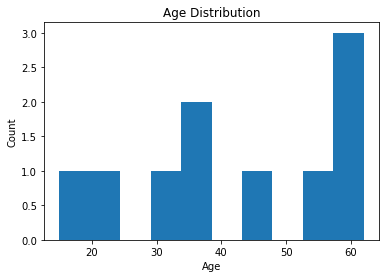

In [15]:
import matplotlib.pyplot as plt
# Visualization 1: Histogram - Age Distribution
plt.hist(merged_df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

The histogram of age is not normally distributed

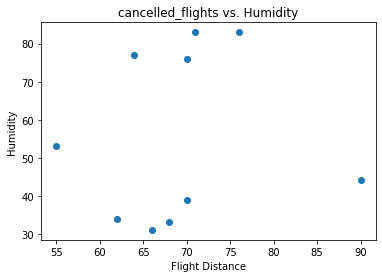

In [18]:
# Visualization 2: Scatter Plot - Cancelled flight vs. humidity
plt.scatter(merged_df['cancelled_flights'], merged_df['Humidity'])
plt.xlabel('Flight Distance')
plt.ylabel('Humidity')
plt.title('cancelled_flights vs. Humidity')
plt.show()


The distribution of cancelled flight and humidity is non linear.

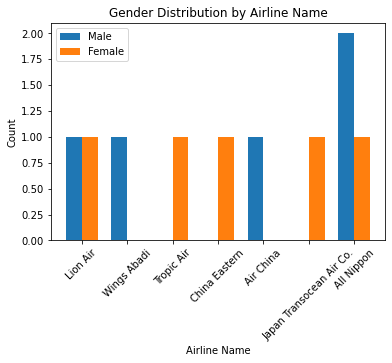

In [34]:
# Visualization 3: bar Plot - airline name vs. gender
# Group the dataset by gender and airline name and calculate the count
grouped_data = merged_df.groupby(['gender', 'airline_name']).size().unstack()

# Get the list of genders and airline names
genders = merged_df['gender'].unique()
airline_names = merged_df['airline_name'].unique()

# Set the width of each bar
bar_width = 0.35

# Set the x-axis positions for each group
x = np.arange(len(airline_names))

# Plot the grouped bar chart
fig, ax = plt.subplots()
for i, gender in enumerate(genders):
    ax.bar(x - bar_width/2 + i*bar_width, grouped_data.loc[gender], bar_width, label=gender)

# Set the x-axis tick positions and labels
ax.set_xticks(x)
ax.set_xticklabels(airline_names, rotation=45)

# Set the labels and title
ax.set_xlabel('Airline Name')
ax.set_ylabel('Count')
ax.set_title('Gender Distribution by Airline Name')

# Add a legend
ax.legend()

# Display the plot
plt.show()


The distribution of females and males is equal across all airline except for Japan Transocean where Males are majority compared to famales.

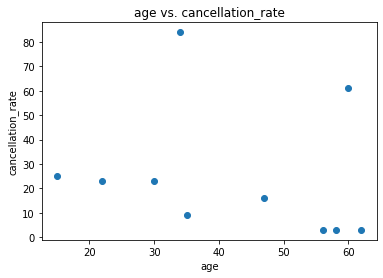

In [25]:
# Visualization 4: Scatter Plot - Age vs. cancellation Rate
plt.scatter(merged_df['age'], merged_df['cancellation_rate'])
plt.xlabel('age')
plt.ylabel('cancellation_rate')
plt.title('age vs. cancellation_rate')
plt.show()

The distribution shows that there is a negative linear relationship between age and cancellation rate. Increase in age causes decrease in cancellation rate.

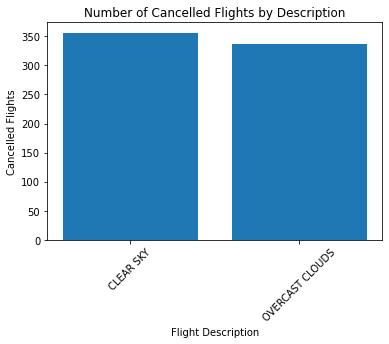

In [31]:
# Visualization 5: bar Plot - Description vs. cancelled flights
# Group the dataset by flight description and calculate the count of cancelled flights
cancelled_flights_by_description = merged_df.groupby('Description')['cancelled_flights'].sum().reset_index()

# Plot the description and cancelled flights
plt.bar(cancelled_flights_by_description['Description'], cancelled_flights_by_description['cancelled_flights'])
plt.xlabel('Flight Description')
plt.ylabel('Cancelled Flights')
plt.title('Number of Cancelled Flights by Description')
plt.xticks(rotation=45)
plt.show()


The distribution of cancelled flights is higher for clear sky compared to overcast clouds according to the plot.

## Summary
I have learned how to load different types of datasets eg flat file, website data and API file. Further I have learned how to Join datasets based on common keys, creating a consolidated dataset.  Later on, creating visualizations: Using libraries like Matplotlib or Seaborn, creating visualizations to analyze and showcase the cleansed data. The example of visualizations, include bar plots, scatter plots, line plots, histograms, and box plots, which can provide insights into the data.

Some of the ethical implications considered are:

Data privacy and consent: When working with datasets, it's crucial to respect privacy and ensure compliance with applicable data protection regulations. Proper anonymization or aggregation techniques should be employed to prevent the identification of individuals or sensitive information.

Bias and fairness: Data cleansing and transformation can inadvertently introduce or perpetuate bias in the datasets. It's important to be aware of bias, both in the original data and the cleaning process, to ensure fair and unbiased analyses and decision-making.

Data accuracy and reliability: The quality of the data used for analysis greatly impacts the validity of the results. Data cleansing should be conducted carefully to minimize errors and inconsistencies, ensuring that the analysis is based on accurate and reliable information.

Data ownership and attribution: When working with datasets from multiple sources, it is essential to respect data ownership and provide appropriate attribution. Adhering to licensing agreements, data usage terms, and giving credit to the original sources promotes transparency and integrity.

Responsible data visualizations: While creating visualizations, it is important to present the data accurately, avoiding misinterpretations or misleading representations. Visualizations should be designed ethically and responsibly, taking care to choose appropriate scales, labels, and descriptions to provide a clear and unbiased understanding of the data.

It's essential to consider ethical implications throughout the data cleansing, analysis, and visualization processes to ensure the responsible and respectful use of data.
  
  

